In [4]:
#Importar librerías necesarias
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as plt
#cambiar el directorio actual con chdir
os.chdir('/Users/Pc/Downloads')
#se usa la funcion read para leer
df = pd.read_csv('general_data_.csv')

In [5]:
#Exploratory Data analysis
df.sample(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1765,40,No,Travel_Rarely,Sales,9,3,Marketing,1,1766,Male,...,0.0,Y,14,8,0,5.0,3,4,2,3
3530,35,No,Travel_Frequently,Research & Development,3,3,Medical,1,3531,Female,...,1.0,Y,11,8,1,2.0,2,2,2,2
937,49,No,Travel_Rarely,Research & Development,21,3,Medical,1,938,Male,...,4.0,Y,13,8,0,23.0,3,8,0,0
1714,53,No,Travel_Rarely,Research & Development,24,3,Other,1,1715,Female,...,7.0,Y,11,8,1,18.0,2,14,8,10
2398,35,Yes,Travel_Frequently,Research & Development,17,4,Medical,1,2399,Male,...,3.0,Y,11,8,1,13.0,3,11,6,7
878,28,Yes,Travel_Rarely,Human Resources,1,3,Medical,1,879,Female,...,1.0,Y,16,8,1,1.0,2,1,0,0
1592,24,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,1593,Female,...,1.0,Y,18,8,3,5.0,4,5,0,3
1849,32,No,Non-Travel,Research & Development,21,3,Life Sciences,1,1850,Male,...,0.0,Y,13,8,0,4.0,3,3,0,2
4231,46,No,Travel_Rarely,Research & Development,9,3,Medical,1,4232,Male,...,8.0,Y,15,8,1,16.0,0,4,0,2
1823,35,No,Travel_Rarely,Research & Development,1,3,Medical,1,1824,Male,...,3.0,Y,13,8,1,17.0,2,8,1,6


In [6]:
df.info()
#Todos los campos que no son numéricos estan como tipo object
#A todos estos campos se los deberia traducir a numericos para que la regresión lineal los tome directamente

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [7]:
#Obtener los principales estadisticos por cada uno
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.00,14.0,18.00,25.0
StandardHours,4410.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


In [8]:
#se ve el total de valores unicos por cada columna
df.nunique()

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
EmployeeID                 4410
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
Over18                        1
PercentSalaryHike            15
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
dtype: int64

In [9]:
df['EmployeeCount']

0       1
1       1
2       1
3       1
4       1
       ..
4405    1
4406    1
4407    1
4408    1
4409    1
Name: EmployeeCount, Length: 4410, dtype: int64

In [ ]:
#Insights
#Inicialmente, se ven algunas oportunidades de cambios de datos como Business Travel, Education Field, Department, etc.
#Se van a generar números para cada una de ellas con la funcion catcodes, pero se podrian tambien generar variables tipo dummy
#La columna EmployeeID tiene un valor diferente por cada registro(es su ID), por lo que no aportaria informacion al modelo. Debe eliminarse
#La columna EmployeeCoun t, Over18 y StandardHours tienen solamente un valor, tiene que eliminarse

In [10]:
#Validacion de datos
df.shape

(4410, 24)

In [11]:
#Validar cuantas celdas en total son nulos
print('Existen', df.isnull().sum().sum(), 'valores no existentes')

Existen 28 valores no existentes


In [12]:
#Numero de datos vacios por columna
missing_values_count = df.isnull().sum()
#Imprime las columnas que tienen mas de 1 dato con nulos
print('Columnas que tienen valores nulos')
missing_values_count

Columnas que tienen valores nulos


Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [13]:
#muestra las columnas que no tiene cero, es decir las que tienen los valores nulos
df.columns[missing_values_count.to_numpy().nonzero()]

Index(['NumCompaniesWorked', 'TotalWorkingYears'], dtype='object')

In [ ]:
#Insight
#La columna NumCompaniesWorked y TotalWorkingYears son las que tiene nulos
#Como tecnica de imputacion, se decide imputar el promedio a cada una de ellas

In [14]:
#Imputacion de datos
#Reemplazar con el promedio general
#Calcula el promedio 
num_comp_worked_mean = int(df['NumCompaniesWorked'].mean())
num_total_workimg_years_mean = int(df['TotalWorkingYears'].mean())
#Imputa el promedio a todos los registros definidos como NaN
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].fillna(num_comp_worked_mean)
df['TotalWorkingYears'] = df['TotalWorkingYears'].fillna(num_total_workimg_years_mean)

In [15]:
#Nueva revision
#Numero de datos vacios  por columna
missing_values_count = df.isnull().sum()
#Imprime las columnas que tienen mas de 1 dato con nulos
print('Columnas que tiene valores nulos')
missing_values_count

Columnas que tiene valores nulos


Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

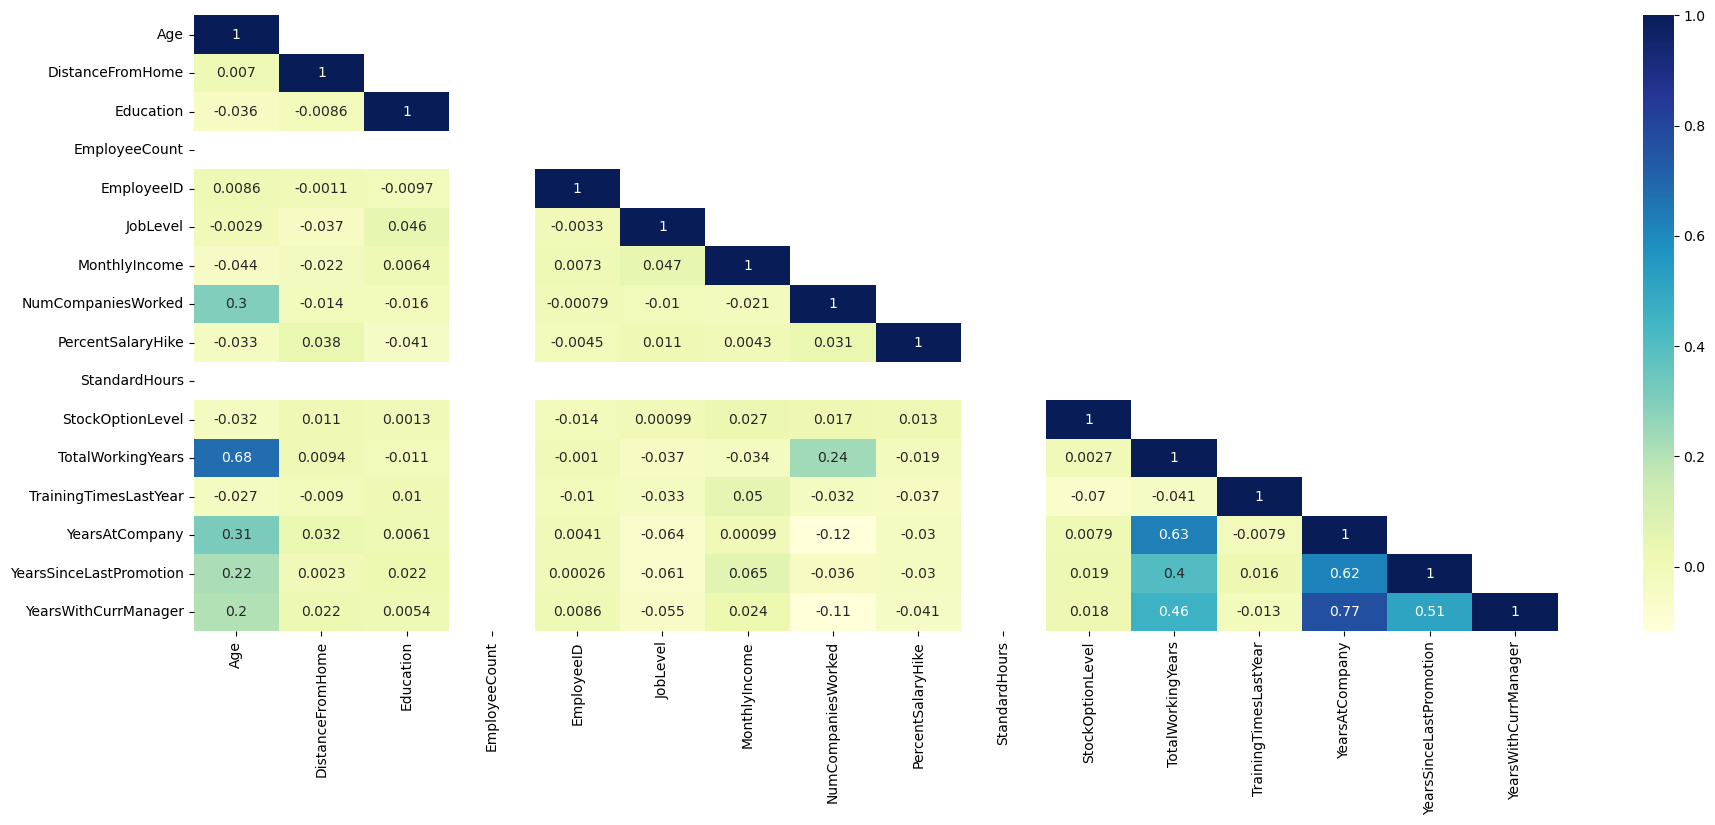

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Selecciona solo columnas numéricas
corr_df = df.select_dtypes(include=[np.number]).corr(method='pearson')

# Matriz triangular inferior para no repetir valores
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))

# Gráfico
plt.figure(figsize=(22,8))
sns.heatmap(df_lt, cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
#Insights
#Se tiene una correlacion alta entre: YearsAtCompany vs YearsWithCurrManager (0.77) y Age (0.68). Son altas correlaciones, pero no se necesita eliminar ninguna columna por multicolinearilidad

In [17]:
#Grafica por distribucion
#Para escoger las columasn numéricas
numerics = ['int16', 'int32', 'int64', 'float']
df.select_dtypes(include=numerics).sample(5)

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
3810,36,21,3,1,3811,2,23290,3.0,15,8,0,9.0,2,3,0,2
2200,41,1,3,1,2201,4,191410,3.0,12,8,1,12.0,2,6,3,3
2471,30,2,1,1,2472,1,104450,3.0,18,8,1,10.0,3,7,1,7
3827,36,18,1,1,3828,2,67250,9.0,17,8,1,7.0,3,3,1,1
917,39,10,3,1,918,2,26840,4.0,12,8,0,7.0,2,5,1,0


In [18]:
#Se selecciona las columnas de tipo numerico
cols_num = df.columns[[np.issubdtype(dt, np.number) for dt in df.dtypes]]

In [19]:
cols_num

Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID',
       'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

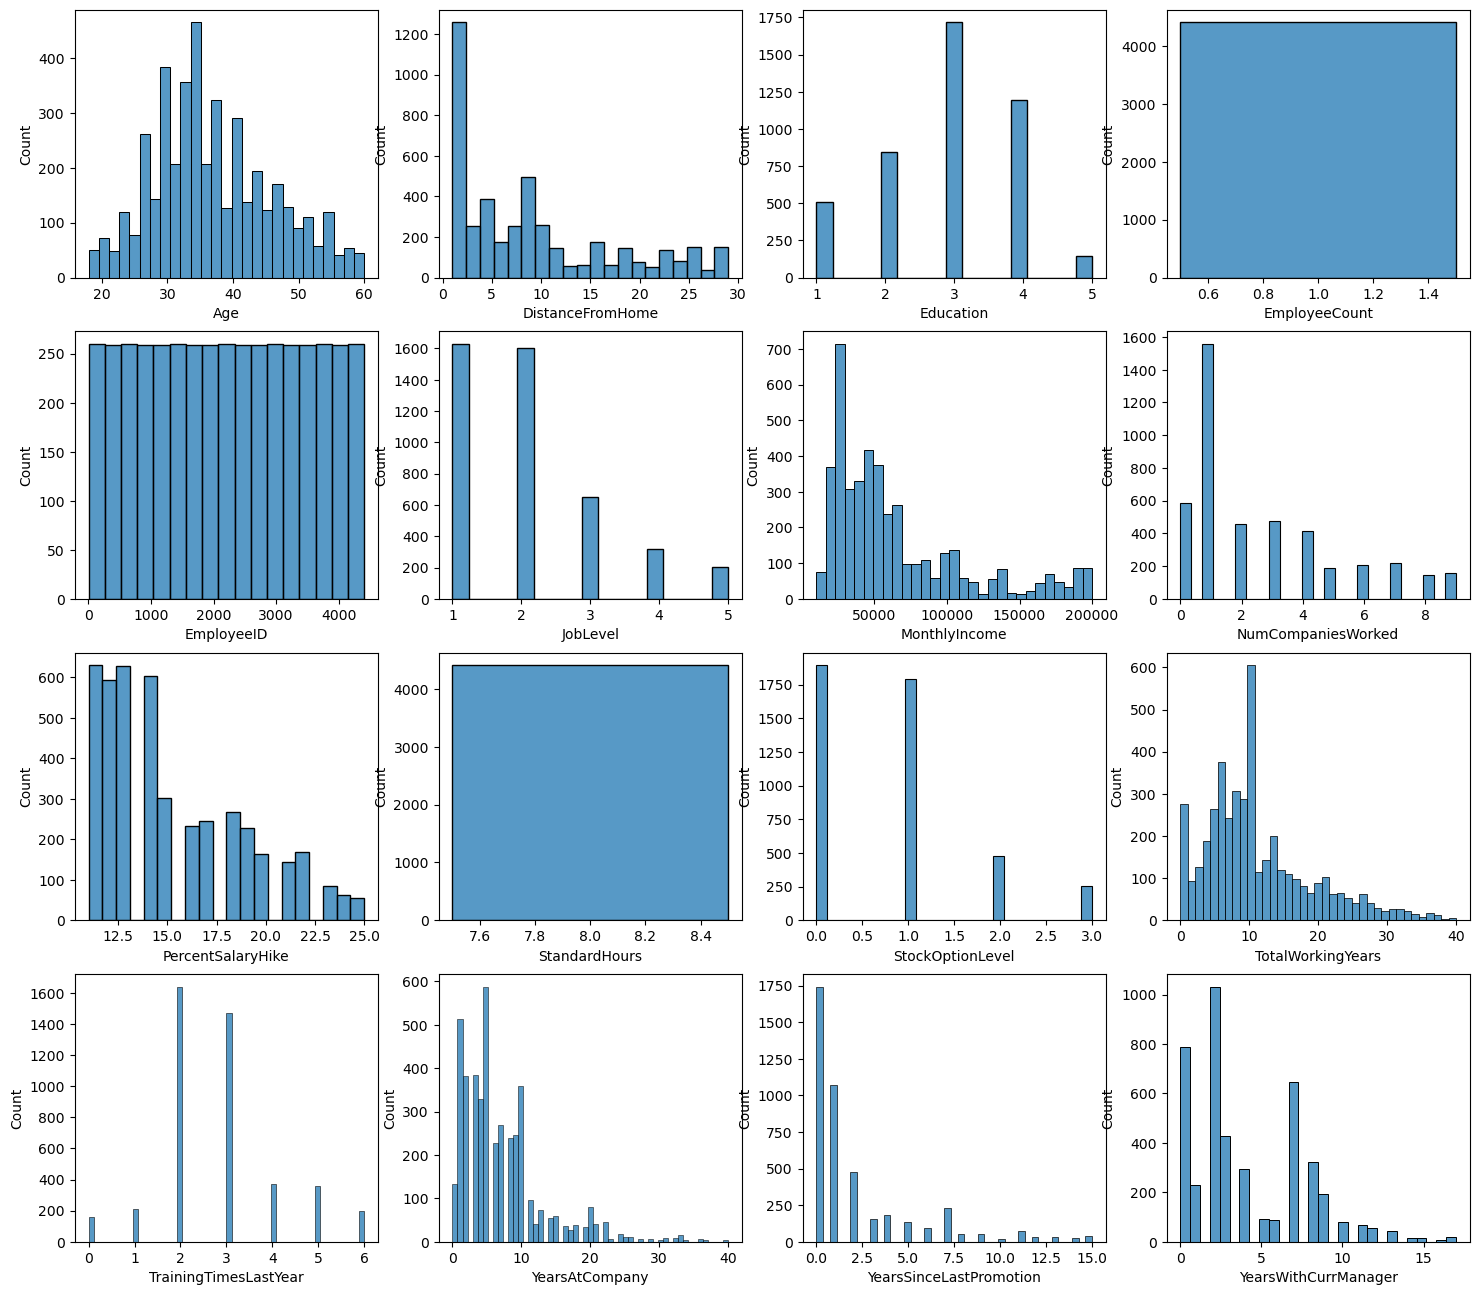

In [20]:
#Grafica exploratoria de todas las columnas
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18,16))
for i , column in enumerate(cols_num):
    sns.histplot(df[column], ax= axes[i//4,i%4], kde=False)

In [ ]:
#Insights
#Las columnas YearsAtCompany, TotalWorkingYears, Monthlylncome parecen estar sesgadas
#El rango de la variable Monthlylncome se podria estandarizar (está en los cientos de miles)
#Las columnas StandardHours, Employeeld no aportan ningun valor al modelo
#EmployeeCount siendo uno seguramente es utilizada para hacer cuentas de empleados y no usar el EmployeeID u otros valores

In [21]:
#Analsiis bivariado
#Se pueden hacer análisis por variables mas bien lógicas.
df.groupby("YearsAtCompany")[df.select_dtypes(include='number').columns].mean().T

YearsAtCompany,0,1,2,3,4,5,6,7,8,9,...,27,29,30,31,32,33,34,36,37,40
Age,31.227273,35.058480,34.708661,35.125000,36.572727,36.862245,35.447368,35.988889,36.987500,39.048780,...,50.0,55.5,50.0,52.333333,50.666667,52.6,52.0,55.0,58.0,58.0
DistanceFromHome,7.204545,8.040936,9.960630,10.015625,10.790909,8.663265,8.407895,9.911111,8.737500,8.329268,...,6.0,12.0,3.0,20.666667,4.333333,13.6,21.0,12.5,8.0,2.0
Education,3.227273,2.853801,2.952756,2.992188,2.900000,2.821429,2.842105,2.811111,2.850000,2.939024,...,4.0,3.0,3.0,2.333333,3.000000,3.0,5.0,2.5,4.0,2.0
EmployeeCount,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0
EmployeeID,2157.613636,2198.777778,2215.937008,2192.351562,2254.445455,2200.653061,2178.013158,2199.677778,2075.462500,2275.353659,...,2191.5,1877.5,2351.0,1786.666667,1983.666667,2483.8,1774.0,1906.0,2781.0,2809.0
JobLevel,1.818182,2.140351,2.039370,2.132812,2.381818,2.040816,1.960526,2.100000,1.925000,2.268293,...,3.5,1.5,2.0,1.333333,2.000000,2.2,3.0,1.0,2.0,1.0
MonthlyIncome,62946.136364,64813.040936,60889.370079,70544.843750,62060.545455,60875.357143,66514.605263,65454.666667,64735.875000,64392.073171,...,65815.0,63980.0,42940.0,42086.666667,22406.666667,46374.0,28890.0,41155.0,29720.0,43850.0
NumCompaniesWorked,2.916667,2.951267,3.519685,3.023438,3.112121,2.770408,2.368421,2.859259,2.687500,1.621951,...,2.5,4.5,2.0,3.000000,1.000000,0.6,1.0,0.5,0.0,1.0
PercentSalaryHike,16.159091,14.877193,15.503937,15.125000,15.700000,15.056122,15.565789,15.333333,15.450000,15.365854,...,13.0,16.0,20.0,18.333333,13.000000,17.4,11.0,17.5,14.0,13.0
StandardHours,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,8.0,8.0,8.0,8.000000,8.000000,8.0,8.0,8.0,8.0,8.0


In [22]:
df.groupby("JobLevel")[df.select_dtypes(include='number').columns].mean().T

JobLevel,1,2,3,4,5
Age,36.775322,37.367041,36.266055,36.377358,37.579710
DistanceFromHome,9.381215,9.415730,8.784404,8.273585,8.681159
Education,2.841621,2.945693,2.940367,3.047170,2.927536
EmployeeCount,1.000000,1.000000,1.000000,1.000000,1.000000
EmployeeID,2189.810313,2237.709738,2196.220183,2142.886792,2205.202899
JobLevel,1.000000,2.000000,3.000000,4.000000,5.000000
MonthlyIncome,62677.421731,65506.479401,63545.321101,77940.754717,64698.405797
NumCompaniesWorked,2.669122,2.742821,2.772171,2.443396,2.603865
PercentSalaryHike,14.963168,15.475655,15.412844,14.783019,15.101449
StandardHours,8.000000,8.000000,8.000000,8.000000,8.000000


In [23]:
#Genera una copia del df orifinal
df2 = df.copy()

In [24]:
#Se obitnee una muestra del nuevo dataframe
df2.sample(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
377,35,No,Travel_Rarely,Research & Development,9,2,Life Sciences,1,378,Female,...,1.0,Y,13,8,1,17.0,2,17,5,15
1882,27,No,Travel_Rarely,Research & Development,1,3,Medical,1,1883,Male,...,1.0,Y,14,8,1,1.0,5,1,0,0
1828,51,No,Travel_Rarely,Sales,16,3,Medical,1,1829,Male,...,2.0,Y,15,8,3,29.0,0,20,4,17
1402,52,No,Travel_Rarely,Research & Development,2,4,Medical,1,1403,Female,...,0.0,Y,11,8,1,34.0,3,33,11,9
989,31,No,Travel_Rarely,Research & Development,3,2,Life Sciences,1,990,Male,...,1.0,Y,15,8,2,6.0,3,5,0,2
1194,50,Yes,Travel_Frequently,Sales,4,2,Life Sciences,1,1195,Female,...,7.0,Y,14,8,1,12.0,2,6,0,1
188,41,No,Non-Travel,Research & Development,3,2,Life Sciences,1,189,Female,...,7.0,Y,17,8,1,16.0,2,14,1,10
4115,25,No,Travel_Rarely,Research & Development,2,4,Medical,1,4116,Female,...,0.0,Y,21,8,0,6.0,2,5,0,4
3052,21,Yes,Travel_Rarely,Human Resources,10,2,Human Resources,1,3053,Male,...,1.0,Y,12,8,1,1.0,2,1,0,0
618,20,No,Travel_Rarely,Research & Development,18,4,Medical,1,619,Male,...,1.0,Y,13,8,0,2.0,2,2,2,2


In [25]:
df2.drop('EmployeeID', axis=1, inplace=True)
df2.drop('StandardHours', axis=1, inplace=True)
df2.drop('EmployeeCount', axis=1, inplace=True)

In [26]:
#Eliminar columnas no necesarias
#Estas son columnas que no traian informacion relevante al modelo
#EmployeeID es un ID único de cada empleado
#Mientras que standardHours, over18 y Employeecount tenian 1 solo valor a lo largo del dataframe

df2.drop('Over18', axis=1, inplace=True)


In [27]:
#cambia de tipo de columna a category
df2['BusinessTravel'] = df2['BusinessTravel'].astype('category')
df2['Department'] = df2['Department'].astype('category')
df2['EducationField'] = df2['EducationField'].astype('category')
df2['Gender'] = df2['Gender'].astype('category')


In [28]:
#Cambia la columna NumCompaniesWorked a entero
df2['NumCompaniesWorked'] = df2['NumCompaniesWorked'].fillna(0).astype(np.int64)

In [29]:
#Numero muestreo del dataframe reducido
df2.sample(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
4300,41,No,Travel_Rarely,Research & Development,10,4,Medical,Male,4,Research Scientist,Married,57430,2,12,3,7.0,2,5,1,4
2849,30,No,Travel_Rarely,Human Resources,1,4,Human Resources,Female,1,Manager,Married,174260,2,12,1,12.0,0,10,7,4
4174,34,No,Travel_Rarely,Sales,24,3,Marketing,Male,4,Research Scientist,Single,27420,0,11,1,13.0,2,12,2,11


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      4410 non-null   int64   
 1   Attrition                4410 non-null   object  
 2   BusinessTravel           4410 non-null   category
 3   Department               4410 non-null   category
 4   DistanceFromHome         4410 non-null   int64   
 5   Education                4410 non-null   int64   
 6   EducationField           4410 non-null   category
 7   Gender                   4410 non-null   category
 8   JobLevel                 4410 non-null   int64   
 9   JobRole                  4410 non-null   object  
 10  MaritalStatus            4410 non-null   object  
 11  MonthlyIncome            4410 non-null   int64   
 12  NumCompaniesWorked       4410 non-null   int64   
 13  PercentSalaryHike        4410 non-null   int64   
 14  StockOpt

In [31]:
#Obtiene los distintos valores
print(df2['EducationField'].value_counts())
print('')
#Obtiene los distintos valores
print(df2['BusinessTravel'].value_counts())
print('')

#Obtiene los distintos valores
print(df2['Department'].value_counts())
print('')

EducationField
Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: count, dtype: int64

BusinessTravel
Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: count, dtype: int64

Department
Research & Development    2883
Sales                     1338
Human Resources            189
Name: count, dtype: int64



In [32]:
#Category codes autom,atico
df2.Gender = df2.Gender.astype("category").cat.codes
df2.EducationField = df2.EducationField.astype("category").cat.codes
df2.BusinessTravel = df2.BusinessTravel.astype("category").cat.codes
df2.Department = df2.Department.astype("category").cat.codes
df2.MaritalStatus = df2.MaritalStatus.astype("category").cat.codes
df2.JobRole = df2.JobRole.astype("category").cat.codes

In [33]:
df2.Attrition = df2.Attrition.astype("category").cat.codes

In [34]:
df2.sample(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
2559,36,0,1,1,5,3,3,0,4,4,2,177790,1,17,1,10.0,5,10,0,8
857,34,0,2,1,3,3,1,1,2,7,2,20440,1,11,0,1.0,2,1,0,0
229,20,0,2,1,17,4,3,0,1,8,2,22930,1,13,2,1.0,3,1,0,0
1205,31,0,0,1,8,4,1,0,4,7,2,147320,0,12,0,10.0,3,9,1,7
1055,29,1,2,1,8,2,3,1,1,3,0,28530,4,14,1,4.0,5,2,2,0
4381,29,1,2,1,7,1,1,0,1,6,2,21800,1,21,0,4.0,2,4,0,1
341,36,0,2,1,2,3,1,1,2,0,1,27200,4,14,1,8.0,3,5,0,4
3870,29,0,2,1,1,2,3,1,2,8,0,42400,1,14,0,10.0,2,10,0,9
270,50,1,1,1,4,2,3,1,4,8,1,44240,3,14,1,18.0,2,4,1,3
2436,26,0,2,1,9,1,3,1,1,7,1,106860,1,14,1,3.0,2,3,0,2


In [35]:
#Si es que las dimensiones de los campos son demasiado grandes
#es ideal estandarizarlas
#Como por ejemplo Income, que tiene un orden de magnitud mas grande que el resto
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2['MonthlyIncome_scale'] = StandardScaler().fit_transform(df2[['MonthlyIncome']])

In [36]:
df2.drop('MonthlyIncome_scale', axis=1, inplace=True)

In [37]:
#Data split
from sklearn.model_selection import train_test_split
X = df2.drop('Attrition', axis=1)
y = df2['Attrition'] #Clase a predecir
#Se divide a X y y es un ratio 70:30
#Convert categorical variables to dummy variables
# x= pd.get_dummies( X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.30, random_state=1)

In [38]:
X.head(5)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,2,2,6,2,1,0,1,0,1,131160,1,11,0,1.0,6,1,0,0
1,31,1,1,10,1,1,0,1,6,2,41890,0,23,1,6.0,3,5,1,4
2,32,1,1,17,4,4,1,4,7,1,193280,1,15,3,5.0,2,5,0,3
3,38,0,1,2,5,1,1,3,1,1,83210,3,11,3,13.0,5,8,7,5
4,32,2,1,10,1,3,1,1,7,2,23420,4,12,2,9.0,2,6,0,4


In [39]:
y.head(10)

0    0
1    1
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    0
Name: Attrition, dtype: int8

In [40]:
#Regresion logistica
print(df2['Attrition'].value_counts())
print(df2['Attrition'].value_counts(normalize=True))

Attrition
0    3699
1     711
Name: count, dtype: int64
Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64


In [41]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

#Aporta el modelo a los X_train y y_train (entrenamiento)
model= LogisticRegression(solver= "liblinear", class_weight='balanced')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [42]:
#La prediccion no es mas que un conjunto de 0 y 1 aplican al mismo dataset
y_predict[0:200]

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1], dtype=int8)

In [43]:
#Build a dataframe with the original and predicted value
z = X_test.copy()
z['Attrition real'] = y_test
z['Attrition prediccion'] = y_predict
z[['Attrition real', 'Attrition prediccion']].head(20)

,Attrition real,Attrition prediccion
2016,0,0
4118,0,1
219,0,0
4402,1,0
787,0,0
200,0,0
2539,0,0
3744,0,1
1891,0,0
3963,1,1


In [45]:
#Genera los coeficientes de la ecuacion
coef_df = pd.DataFrame(model.coef_)
coef_df.columns = X.columns
#Incluye el intercept
coef_df['intercept'] = model.intercept_
coef_df.T

,0
Age,-1.939586e-02
BusinessTravel,6.642526e-02
Department,-2.783756e-01
DistanceFromHome,3.043095e-03
Education,-1.615667e-02
EducationField,-6.963393e-02
Gender,2.008165e-01
JobLevel,-6.138634e-02
JobRole,5.863604e-02
MaritalStatus,6.391862e-01


Text(0.5, 1.0, 'Matriz de confusion')

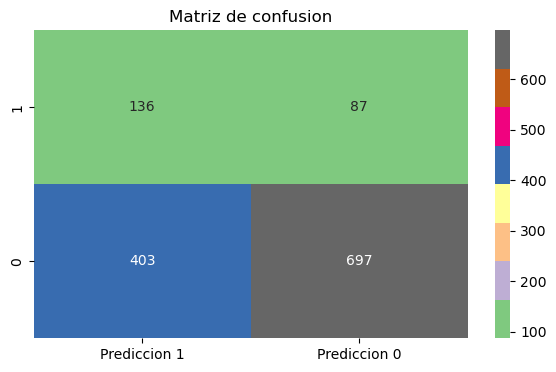

In [46]:
#Matriz
#Genera la matriz de confusion
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                     columns= [i for i in ["Prediccion 1", "Prediccion 0"]])
plt.figure(figsize = (7,4))
sns.heatmap(df_cm, annot=True, cmap='Accent', fmt= 'd').set_title("Matriz de confusion")

In [47]:
#Calculo manual de falsos positivos , falsos negativos, verdaderos positivos y verdaderos negativos
TP= df_cm.iloc[0][0]
FP= df_cm.iloc[0][1]
FN= df_cm.iloc[1][0]
TN= df_cm.iloc[1][1]

C:\Users\Pc\AppData\Local\Temp\ipykernel_8876\51792880.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  TP= df_cm.iloc[0][0]
C:\Users\Pc\AppData\Local\Temp\ipykernel_8876\51792880.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  FP= df_cm.iloc[0][1]
C:\Users\Pc\AppData\Local\Temp\ipykernel_8876\51792880.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  FN= df_cm.iloc[1][0]
C:\Users\Pc\AppData\Local\Temp\ipykernel_8876\517928

In [48]:
#Medidas del modelo
from sklearn.metrics import accuracy_score , f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)
model_score = accuracy_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
print('Medidas del Modelo')
print('Accuracy = {0:0.2f}'.format(model_score))
print('Precision = {0:0.2f}'.format(precision_score))
print('Recall = {0:0.2f}'.format(recall_score))
print('F1 Score = {0:0.2f}'.format(f1_score))
print("Roc Auc Score = = {0:0.2f}".format(roc_auc_score(y_test, y_pred)))

Medidas del Modelo
Accuracy = 0.63
Precision = 0.25
Recall = 0.61
F1 Score = 0.36
Roc Auc Score = = 0.62
